In [ ]:
#import numpy as np

#data1 = np.load('processed_image.npy', allow_pickle=True)
#data2 = np.load('processed_image2.npy', allow_pickle=True)
#data = np.concatenate((data1, data2), axis=0)


In [ ]:
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/AI/Project')

Mounted at /content/drive


In [ ]:
X_gene=np.load('x_gene0.npy',allow_pickle=True)
y=np.load('y0.npy',allow_pickle=True)
X_img=np.load('x_image0.npy',allow_pickle=True)

In [ ]:
X_gene.shape

(115, 315)

In [ ]:
X_img.shape

(115, 256, 256)

In [ ]:
print(X_img[0,:,:])

[[244 244 244 ...   0   0   0]
 [244 244 244 ...   0   0   0]
 [244 244 244 ...   0   0   0]
 ...
 [  0   0   0 ... 242 242 242]
 [  0   0   0 ... 242 242 242]
 [  0   0   0 ... 242 242 242]]


In [ ]:
#X=[]
#y=[]
#for d in data:
#    X.append(d[0])
#    y.append(d[2])
    
#X = np.array(X)
#y = np.array(y)


In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,
#                                                      random_state=2022,
#                                                      shuffle=True,
#                                                      stratify=y)


In [ ]:
#Import the required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical#np_utils
from tensorflow.keras.optimizers import Adam

In [ ]:
X_gene.shape

(115, 315)

In [ ]:
X_gene.shape

(115, 315)

In [ ]:
input_img=layers.Input(shape=(256, 256,1 ))
input_gene=layers.Input(shape=(315,))

In [ ]:
x_img=layers.Conv2D(32, (3, 3), activation='relu')(input_img)
x_img=layers.MaxPooling2D((2, 2))(x_img)
x_img=layers.Conv2D(64, (3, 3), activation='relu')(x_img)
x_img=layers.MaxPooling2D((2, 2))(x_img)
x_img=layers.Conv2D(64, (3, 3), activation='relu')(x_img)
x_img=layers.MaxPooling2D((2, 2))(x_img)
x_img=layers.Flatten()(x_img)
x_img=layers.Dense(64,activation='relu')(x_img)
#out_img=layers.Dense(3,activation='sigmoid')(x_img)

x_gen=layers.Dense(64,activation='relu')(input_gene)

x_combine=layers.Concatenate()([x_img,x_gen])
x_out=layers.Dense(3,activation='sigmoid')(x_combine)

In [ ]:
combined_model=Model([input_img,input_gene],x_out)

In [ ]:
combined_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = combined_model.fit([X_img,X_gene],y,validation_split = 0.1,epochs=30)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


4/4 [==============================] - 10s 2s/step - loss: 237.9770 - accuracy: 0.4369 - val_loss: 102.2866 - val_accuracy: 0.2500
Epoch 2/30
4/4 [==============================] - 9s 2s/step - loss: 39.9958 - accuracy: 0.2816 - val_loss: 2.7593 - val_accuracy: 0.5000
Epoch 3/30
4/4 [==============================] - 9s 2s/step - loss: 2.2198 - accuracy: 0.4854 - val_loss: 1.2664 - val_accuracy: 0.4167
Epoch 4/30
4/4 [==============================] - 9s 2s/step - loss: 1.0959 - accuracy: 0.5534 - val_loss: 1.1282 - val_accuracy: 0.4167
Epoch 5/30
4/4 [==============================] - 9s 2s/step - loss: 0.8662 - accuracy: 0.6602 - val_loss: 1.0891 - val_accuracy: 0.5000
Epoch 6/30
4/4 [==============================] - 9s 2s/step - loss: 0.7410 - accuracy: 0.7476 - val_loss: 1.0146 - val_accuracy: 0.4167
Epoch 7/30
4/4 [==============================] - 9s 2s/step - loss: 0.7319 - accuracy: 0.7573 - val_loss: 1.0036 - val_accuracy: 0.5000
Epoch 8/30
4/4 [==============================

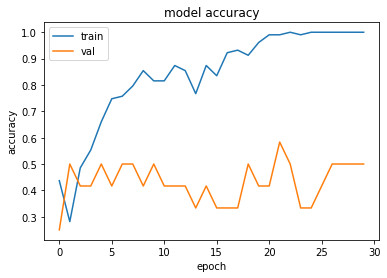

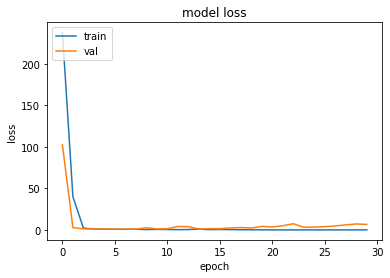

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(3))

#gene_model= models.Sequential()
#gene_model.add(layers.Dense(64,activation='relu',input_shape=(315,1)))
#gene_model.add

In [ ]:
#model.summary()

In [ ]:
#model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])


In [ ]:
#history = model.fit(X_train,y_train,epochs=20, 
#                    validation_data=( X_test, y_test ))

In [ ]:
combined_model.inputs[0]

<KerasTensor: shape=(None, 256, 256, 1) dtype=float32 (created by layer 'input_3')>

In [ ]:
combined_model.layers

In [ ]:
combined_model.layers[1]

In [ ]:
from keras.models import Model
from matplotlib import pyplot
# redefine model to output right after the first hidden layer
model1 = Model(inputs=combined_model.inputs[0], outputs=combined_model.layers[1].output)

In [ ]:
img = X_img[10].reshape(1,256, 256, 1)
gene = X_gene[10]
# get feature map for first hidden layer
feature_maps = model1.predict(img)

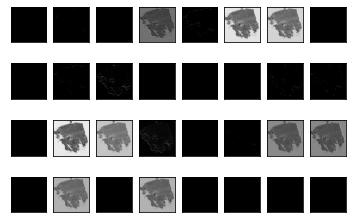

(1, 254, 254, 32)

In [ ]:
square = 8
ix = 1
for _ in range(4):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(4, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()
feature_maps.shape

In [ ]:
combined_model.layers[5]

In [ ]:
ixs = [3,5]
outputs = [combined_model.layers[i].output for i in ixs]
model2 = Model(inputs=combined_model.inputs[0], outputs=outputs)
model2.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 64)        369

In [ ]:
feature_maps = model2.predict(img)

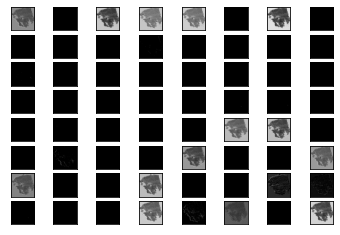

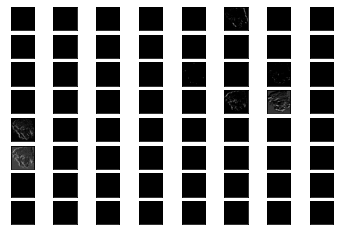

In [ ]:
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

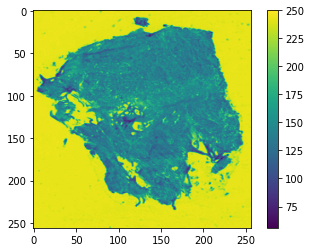

In [ ]:
pyplot.imshow(img[0,:,:,0])
plt.colorbar()

In [ ]:
feature_maps[1].shape

(1, 60, 60, 64)

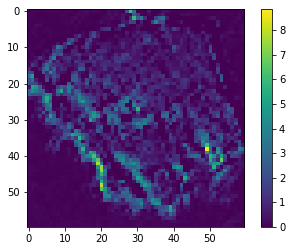

In [ ]:
feature_maps[1][0, :, :, 31].shape
pyplot.imshow(feature_maps[1][0,:,:,32])
plt.colorbar()

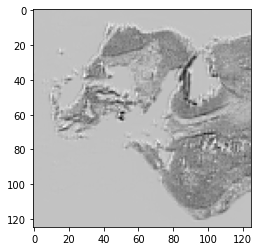

In [ ]:
pyplot.imshow(feature_maps[0][0, :, :, 3])

In [ ]:
feature_maps[0][0, :, :, 3]

array([[17.377151, 17.36238 , 17.398258, ..., 17.362484, 17.362484,
        17.362484],
       [17.416136, 17.396608, 17.42992 , ..., 17.362484, 17.362484,
        17.362484],
       [17.429785, 17.410467, 17.469196, ..., 17.362484, 17.362484,
        17.362484],
       ...,
       [17.362484, 17.362484, 17.362484, ..., 17.297352, 17.299273,
        17.274387],
       [17.362484, 17.362484, 17.362484, ..., 17.271833, 17.29439 ,
        17.312437],
       [17.362484, 17.362484, 17.362484, ..., 17.308409, 17.33992 ,
        17.300177]], dtype=float32)

In [ ]:
z = (feature_maps[0][0, :, :, 3] * 255).astype(np.uint8)

In [ ]:
from PIL import Image
im = Image.fromarray(z,mode="L")
im.show()